<a href="https://colab.research.google.com/github/Goel-Himanshu/Crime-Rate-in-Chicago/blob/main/Crime_Rate_in_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the data

Importing the libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

Importing the Information 

In [2]:
# dataframes creation for both training and testing datasets 
df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = pd.concat([df_1, df_2, df_3], ignore_index=False, axis=0)

# **Exploring the dataset**

In [4]:
# Let's view the head of the training dataset
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


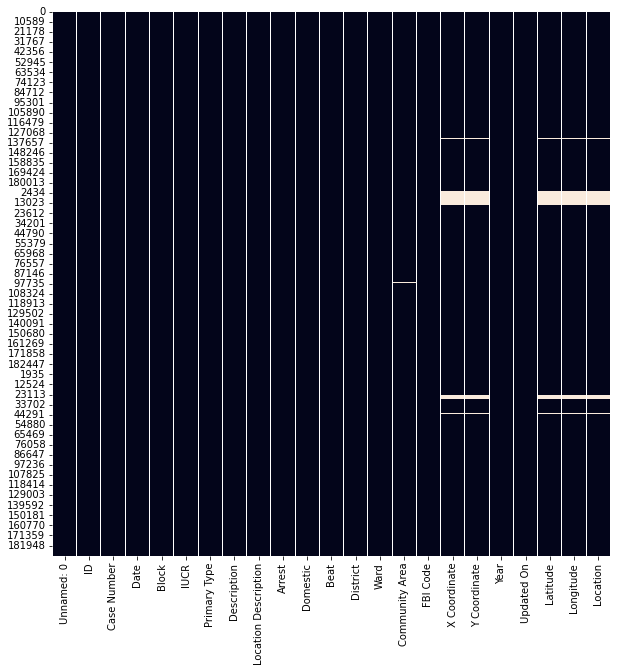

In [5]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar = False)

# Dropping the unrequited columns

In [6]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [7]:
# Assembling a datetime by rearranging the dataframe column "Date". 
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [8]:
# setting the index to be the date 
df.index = pd.DatetimeIndex(df.Date)

In [9]:
df['Primary Type'].value_counts()

THEFT                                115883
BATTERY                              106677
CRIMINAL DAMAGE                       67890
NARCOTICS                             62782
ASSAULT                               35768
OTHER OFFENSE                         35718
BURGLARY                              31490
MOTOR VEHICLE THEFT                   26362
DECEPTIVE PRACTICE                    21830
ROBBERY                               20316
CRIMINAL TRESPASS                     16401
PROSTITUTION                           6177
WEAPONS VIOLATION                      5616
PUBLIC PEACE VIOLATION                 4378
OFFENSE INVOLVING CHILDREN             4008
CRIM SEXUAL ASSAULT                    2237
SEX OFFENSE                            2101
INTERFERENCE WITH PUBLIC OFFICER       1387
LIQUOR LAW VIOLATION                   1190
GAMBLING                               1066
ARSON                                   907
KIDNAPPING                              457
HOMICIDE                        

In [10]:
df['Primary Type'].value_counts().iloc[:15]

THEFT                         115883
BATTERY                       106677
CRIMINAL DAMAGE                67890
NARCOTICS                      62782
ASSAULT                        35768
OTHER OFFENSE                  35718
BURGLARY                       31490
MOTOR VEHICLE THEFT            26362
DECEPTIVE PRACTICE             21830
ROBBERY                        20316
CRIMINAL TRESPASS              16401
PROSTITUTION                    6177
WEAPONS VIOLATION               5616
PUBLIC PEACE VIOLATION          4378
OFFENSE INVOLVING CHILDREN      4008
Name: Primary Type, dtype: int64

In [11]:
df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

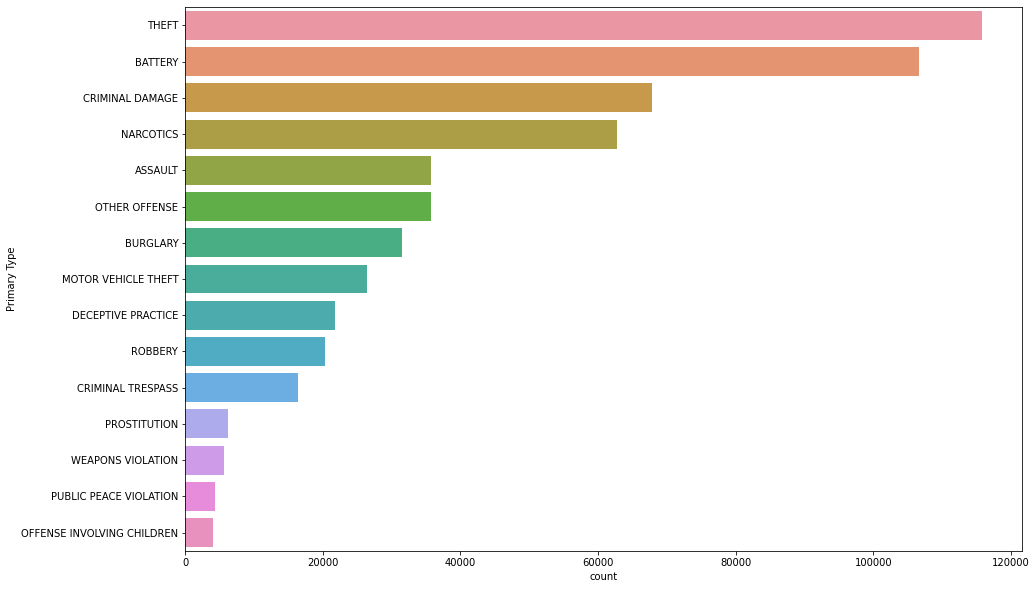

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:15].index)

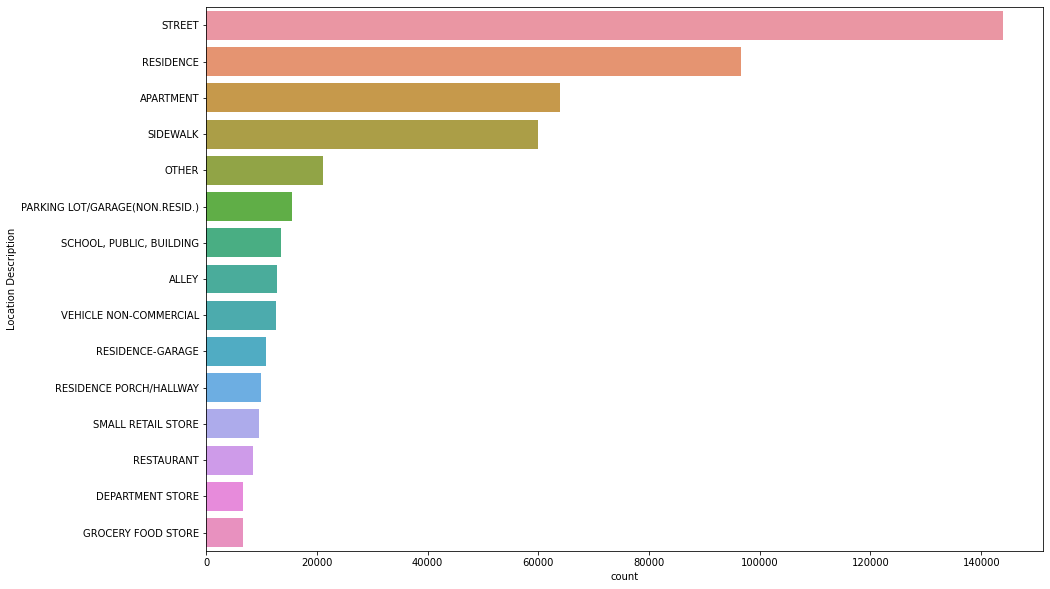

In [13]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:15].index)

In [14]:
df.resample('Y').size()

Date
2005-12-31      1648
2006-12-31    186520
2007-12-31         0
2008-12-31    182851
2009-12-31      6222
2010-12-31      1493
2011-12-31       535
2012-12-31    115893
2013-12-31      1946
2014-12-31      4151
2015-12-31     47454
2016-12-31     23040
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

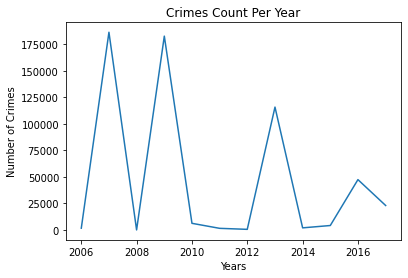

In [15]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.plot(df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [16]:
df.resample('M').size()

Date
2005-01-31       72
2005-02-28       40
2005-03-31       43
2005-04-30       74
2005-05-31       85
              ...  
2016-01-31      809
2016-02-29      123
2016-03-31      213
2016-04-30     1663
2016-05-31    20232
Freq: M, Length: 137, dtype: int64

Text(0, 0.5, 'Number of Crimes')

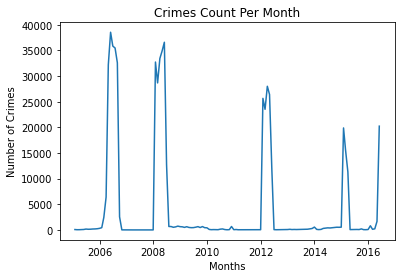

In [17]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.plot(df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [18]:
df.resample('Q').size()

Date
2005-03-31       155
2005-06-30       325
2005-09-30       444
2005-12-31       724
2006-03-31      9289
2006-06-30    106608
2006-09-30     70610
2006-12-31        13
2007-03-31         0
2007-06-30         0
2007-09-30         0
2007-12-31         0
2008-03-31     94848
2008-06-30     84194
2008-09-30      1841
2008-12-31      1968
2009-03-31      1720
2009-06-30      1369
2009-09-30      1632
2009-12-31      1501
2010-03-31       205
2010-06-30       237
2010-09-30       291
2010-12-31       760
2011-03-31       145
2011-06-30       134
2011-09-30       120
2011-12-31       136
2012-03-31     77186
2012-06-30     38366
2012-09-30       149
2012-12-31       192
2013-03-31       282
2013-06-30       268
2013-09-30       363
2013-12-31      1033
2014-03-31       261
2014-06-30      1051
2014-09-30      1266
2014-12-31      1573
2015-03-31     46701
2015-06-30       222
2015-09-30       357
2015-12-31       174
2016-03-31      1145
2016-06-30     21895
Freq: Q-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

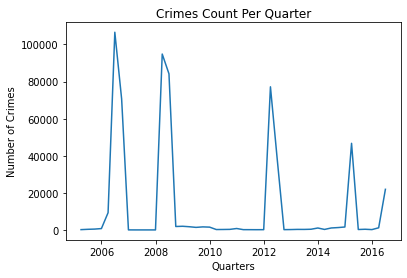

In [19]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.plot(df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# Preparation of the data

In [20]:
prophet = df.resample('M').size().reset_index()

In [21]:
prophet.columns = ['Date', 'Crime Count']

In [22]:
prophet_df = pd.DataFrame(prophet)

# Making Predictions 

In [23]:
prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [24]:
prophet_df_final = prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [25]:
m = Prophet()
m.fit(prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

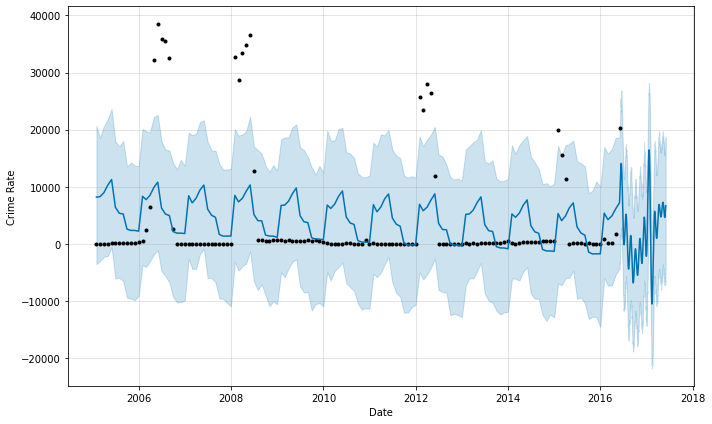

In [27]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

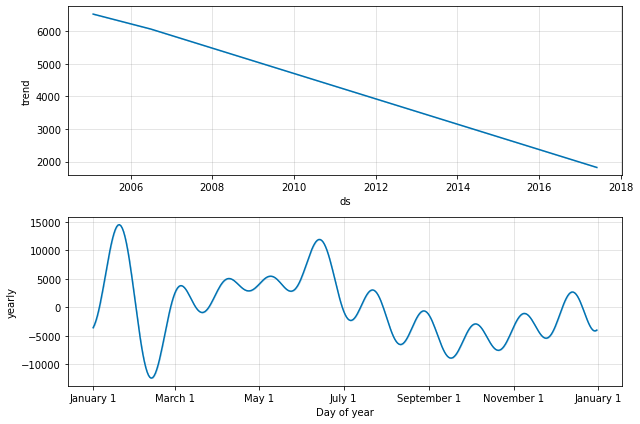

In [29]:
figure1 = m.plot_components(forecast)